## 🎯 Marketing Campaign Analysis – Project Summary
This project analyzes customer behavior data from a marketing campaign to uncover actionable insights that can help increase revenue and customer retention.

### 🗂️ Dataset Overview:
The dataset contains demographic, behavioral, and transactional information for over 2,200 customers.

### Key features include:

Demographics: Age, Education, Marital Status, Income

Customer Behavior: Web visits, Purchases, Product spending

Marketing Response: Campaign acceptance, Complaint status, Recency of last purchase

### 🧪 Objective:
To explore customer patterns and identify:

The most valuable customer segments

Popular purchase channels and product categories

Key factors that influence spending

Opportunities to target campaigns effectively

### ⚙️ Steps Performed:
Data Cleaning

Removed unnecessary columns

Fixed inconsistent categories

Handled missing values in Income

Feature Engineering

Created Age, Customer_For_Years, TotalSpend, FamilySize

Grouped categories for Marital_Status and Education

Exploratory Data Analysis (EDA)

Visualized spending behavior across age groups, income, and marital status

Analyzed product category preferences

Checked correlation between Recency and Total Spend

Segmentation

Grouped customers based on spend level and age group

Compared response to marketing campaigns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [3]:
marketing=pd.read_csv('../Data/marketing_campaign.csv',sep='\t')
marketing

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 🏗️ Feature Engineering

In [7]:
marketing['TotalAcceptedCmp'] = marketing[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


In [8]:
marketing.drop(columns=['Z_CostContact', 'Z_Revenue'],inplace=True)


In [9]:
marketing['TotalSpend'] = marketing[['MntWines', 'MntFruits', 'MntMeatProducts',
                                     'MntFishProducts', 'MntSweetProducts',
                                     'MntGoldProds']].sum(axis=1)

In [10]:
marketing['Age'] = 2025 - marketing['Year_Birth']
marketing = marketing.drop(columns='Year_Birth')

In [11]:
marketing['ID'].duplicated().sum()

0

In [12]:
marketing = marketing.drop(columns='ID')

In [13]:
marketing['Customer_For_Years'] = (pd.to_datetime('today') - pd.to_datetime(marketing['Dt_Customer'],dayfirst=True)).dt.days // 365
marketing = marketing.drop('Dt_Customer', axis=1)

###### 💍 Spending by Marital Status

Analyzing whether single or partnered customers spend more on average.


In [15]:
marketing['Partner'] = marketing['Marital_Status'].map(
    lambda x: 1 if x in ['Married', 'Together'] else 0)

In [16]:
marketing['FamilySize'] = 1 + marketing['Partner'] + marketing['Kidhome'] + marketing['Teenhome']

In [17]:
marketing.drop('Partner', axis=1, inplace=True)

In [18]:
marketing=marketing.drop(columns=['Kidhome','Teenhome'])

###### 🎓 Spending by Education Level

Understanding how educational background relates to customer spending.


In [20]:
marketing['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [21]:
marketing['Education'] = marketing['Education'].replace({
    '2n Cycle': 'Master',
    'Graduation': 'Bachelor',
    'Basic': 'Primary',
})
marketing['Education'].value_counts()

Education
Bachelor    1127
Master       573
PhD          486
Primary       54
Name: count, dtype: int64

In [22]:
marketing

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0     Bachelor         Single  58138.0       58       635         88   
1     Bachelor         Single  46344.0       38        11          1   
2     Bachelor       Together  71613.0       26       426         49   
3     Bachelor       Together  26646.0       26        11          4   
4          PhD        Married  58293.0       94       173         43   
...        ...            ...      ...      ...       ...        ...   
2235  Bachelor        Married  61223.0       46       709         43   
2236       PhD       Together  64014.0       56       406          0   
2237  Bachelor       Divorced  56981.0       91       908         48   
2238    Master       Together  69245.0        8       428         30   
2239       PhD        Married  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0                0             0             0         0         1   
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2235             0             0             0         0         0   
2236             0             1             0         0         0   
2237             0             0             0         0         0   
2238             0             0             0         0         0   
2239             0             0             0         0         1   

      TotalAcceptedCmp  TotalSpend  Age  Customer_For_Years  FamilySize  
0                    0        1617   68                  12           1  
1                    0          27   71                  11           3  
2                    0         776   60                  11           2  
3                    0          53   41                  11           3  
4                    0         422   44                  11           3  
...                ...         ...  ...                 ...         ...  
2235                 0        1341   58                  12           3  
2236                 1         444   79                  11           5  
2237                 1        1241   44                  11           1  
2238                 0         843   69                  11           3  
2239                 0         172   71                  12           4  

[2240 rows x 27 columns]

<Axes: >

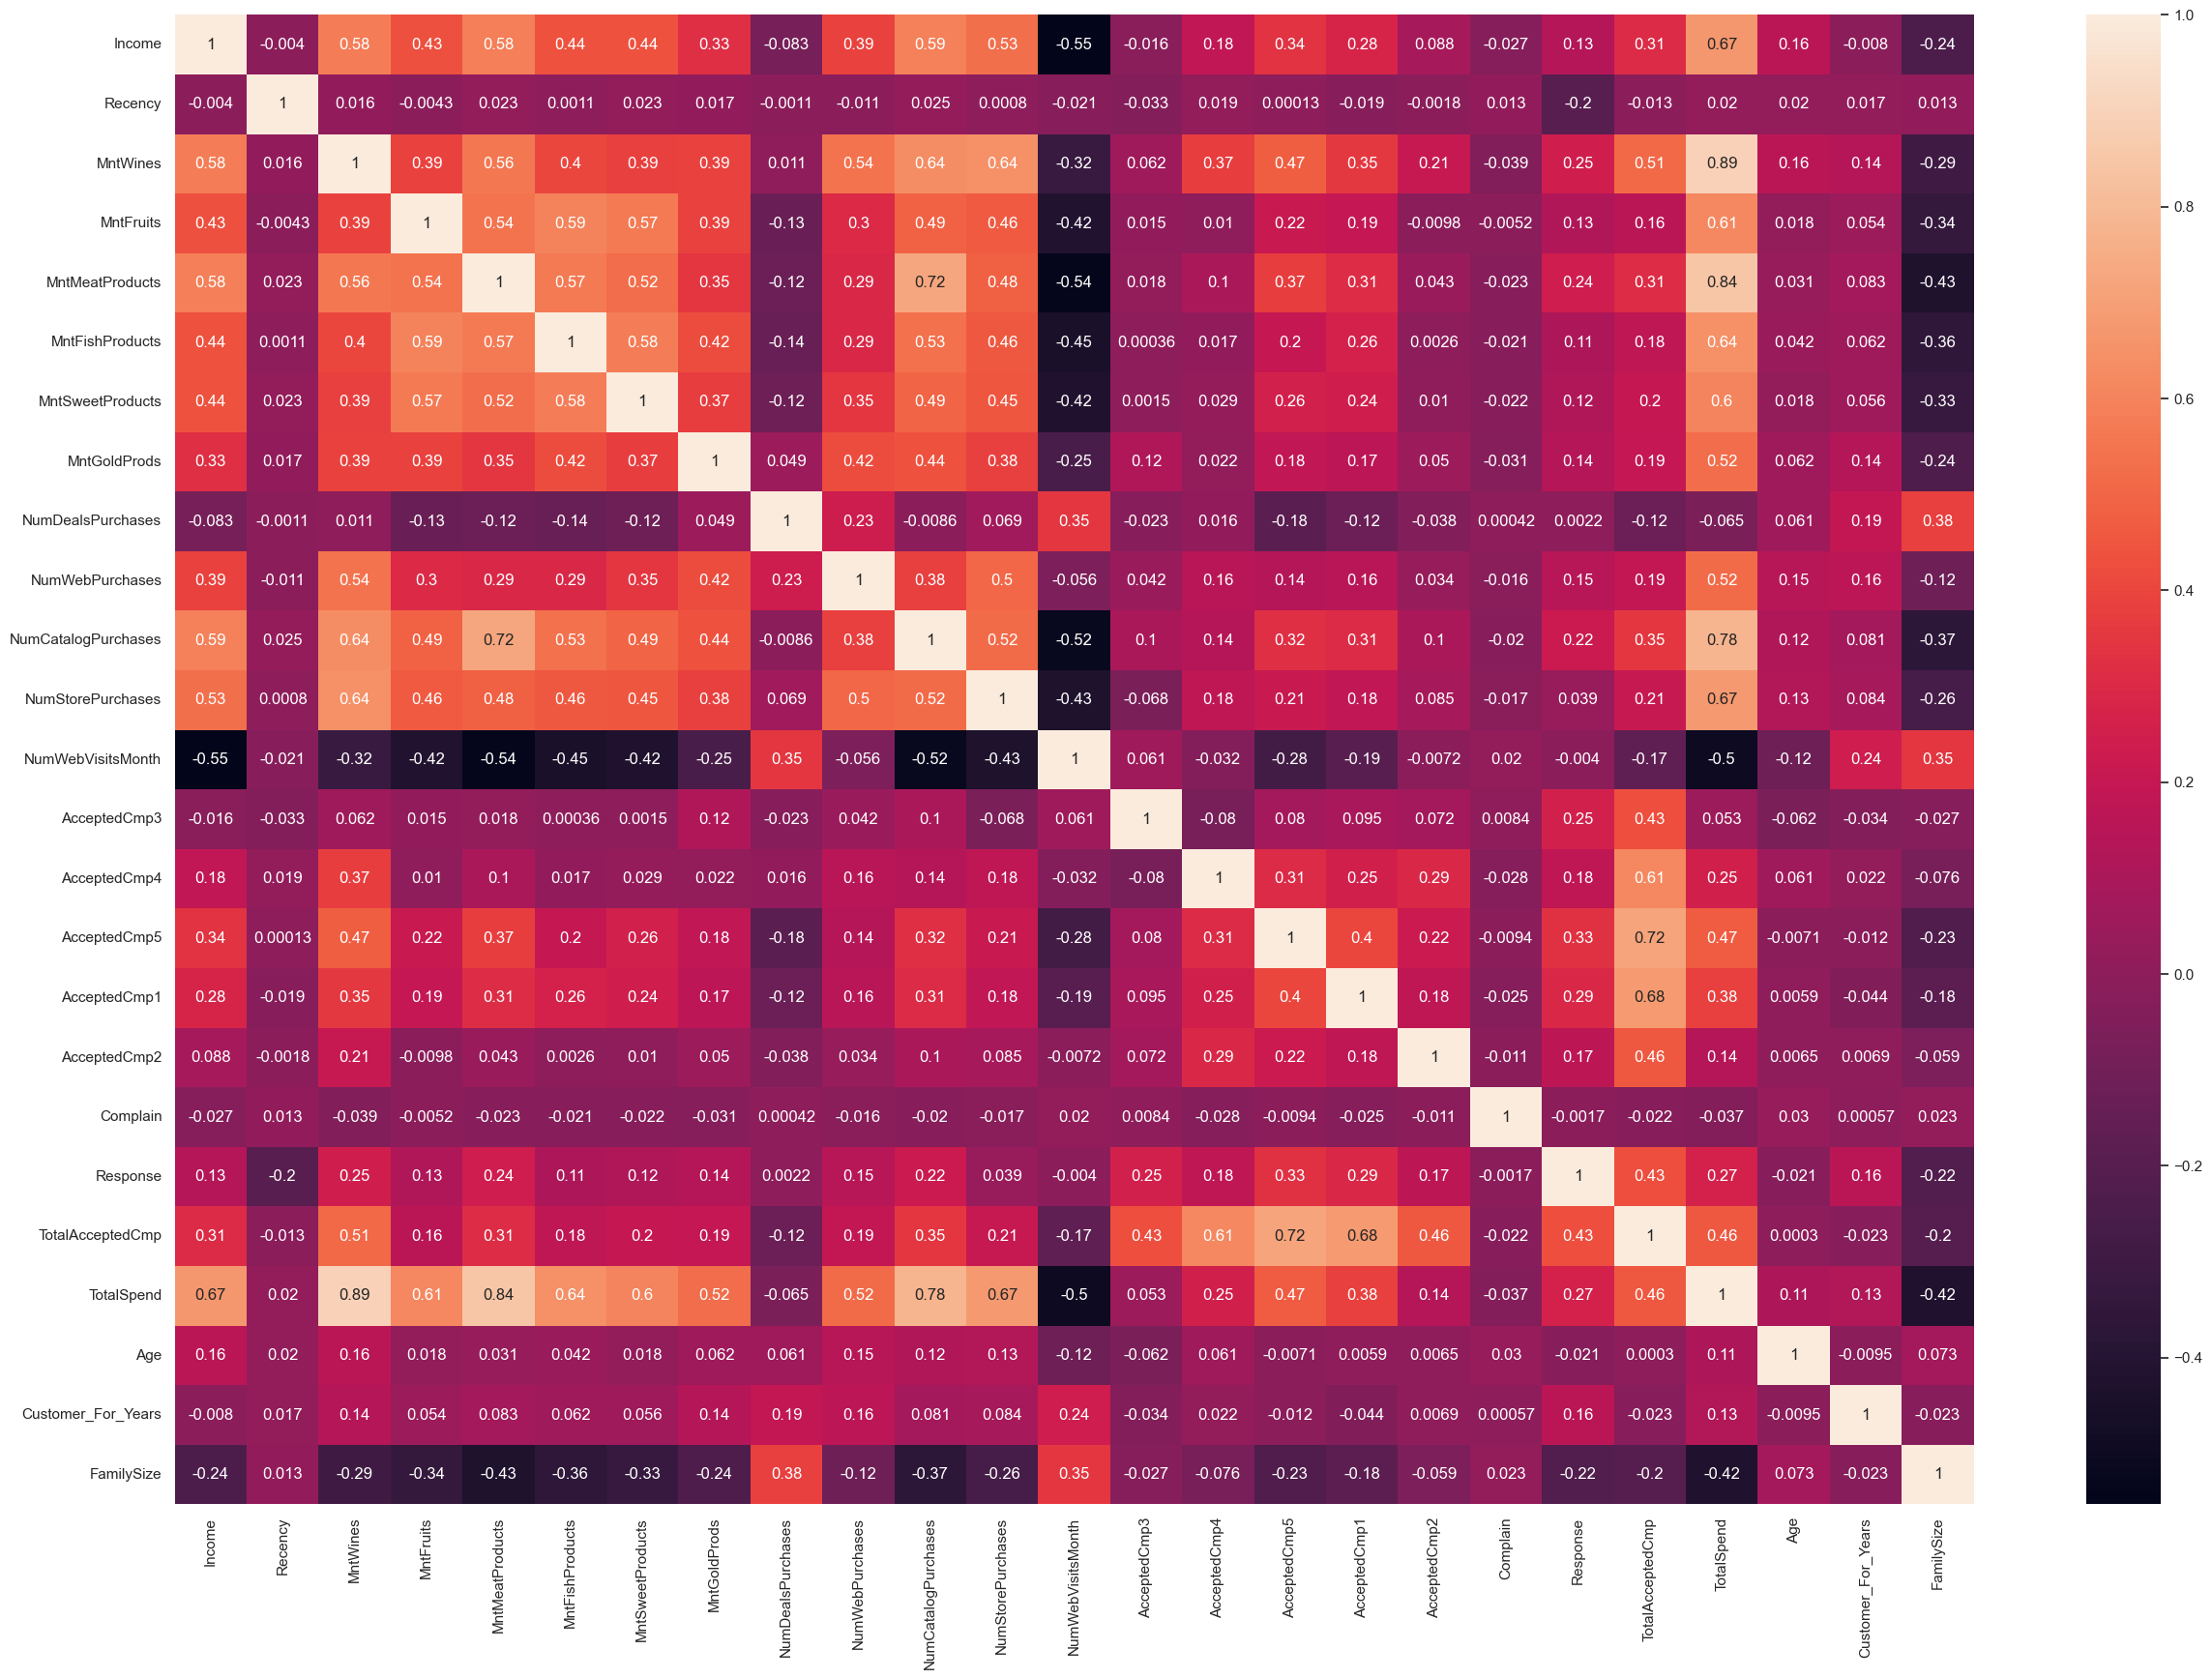

In [23]:
corr=marketing.corr(numeric_only=True)
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True)

## 🧹 Data Cleaning

- Standardized inconsistent category labels.
- Grouped similar values for better clarity.
- Removed outliers using the IQR method.

In [25]:
marketing['Education'] = marketing['Education'].astype('category')
marketing['Marital_Status'] = marketing['Marital_Status'].astype('category')

In [26]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2240 non-null   category
 1   Marital_Status       2240 non-null   category
 2   Income               2216 non-null   float64 
 3   Recency              2240 non-null   int64   
 4   MntWines             2240 non-null   int64   
 5   MntFruits            2240 non-null   int64   
 6   MntMeatProducts      2240 non-null   int64   
 7   MntFishProducts      2240 non-null   int64   
 8   MntSweetProducts     2240 non-null   int64   
 9   MntGoldProds         2240 non-null   int64   
 10  NumDealsPurchases    2240 non-null   int64   
 11  NumWebPurchases      2240 non-null   int64   
 12  NumCatalogPurchases  2240 non-null   int64   
 13  NumStorePurchases    2240 non-null   int64   
 14  NumWebVisitsMonth    2240 non-null   int64   
 15  AcceptedCmp3         

In [27]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [28]:
marketing['Marital_Status']=marketing['Marital_Status'].replace({'Alone':'Single','Widow':'Single',
                                                                 'YOLO':'Single','Married':'Partnered',
                                                                  'Together':'Partnered',
                                                                   'Absurd':'Single'})
marketing['Marital_Status'].value_counts()

C:\Users\adham\AppData\Local\Temp\ipykernel_8052\2761893073.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  marketing['Marital_Status']=marketing['Marital_Status'].replace({'Alone':'Single','Widow':'Single',


Marital_Status
Partnered    1444
Single        564
Divorced      232
Name: count, dtype: int64

<Axes: >

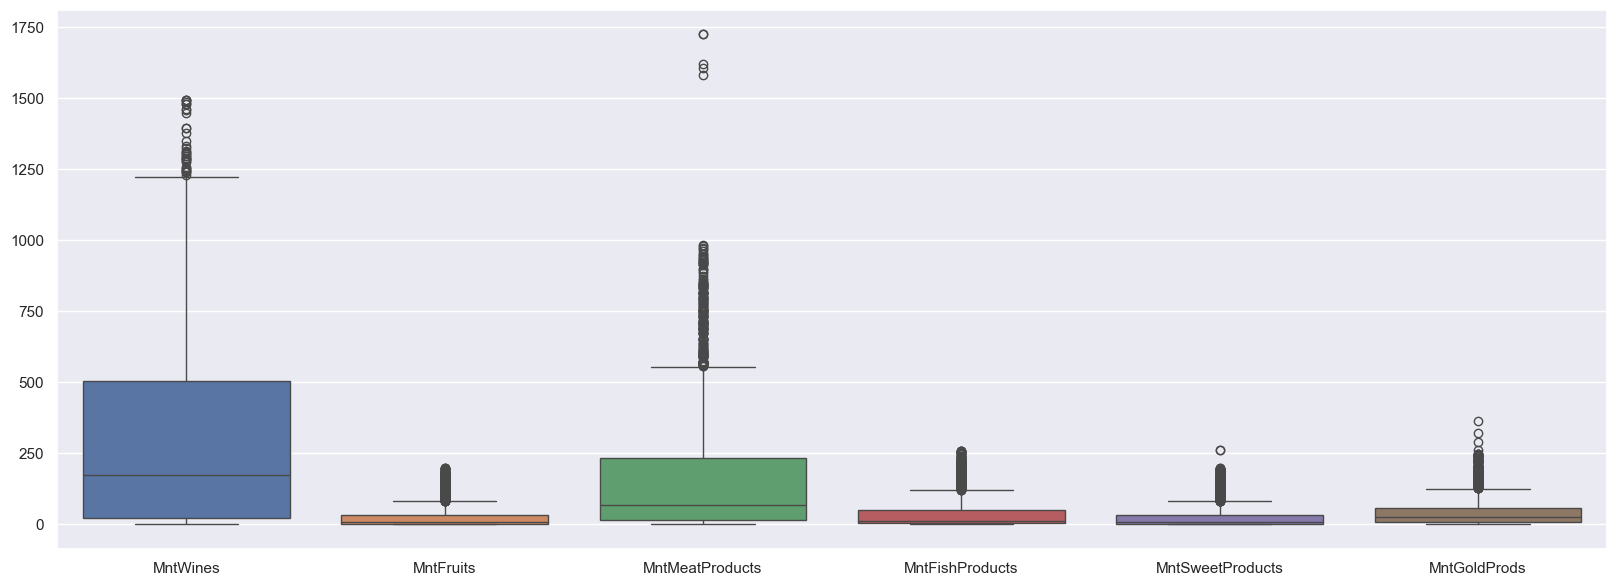

In [29]:
plt.figure(figsize=(20,7))
sns.boxplot(data=marketing[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']])

In [30]:
marketing.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalAcceptedCmp',
       'TotalSpend', 'Age', 'Customer_For_Years', 'FamilySize'],
      dtype='object')

In [31]:
df_num=marketing.select_dtypes(include=['float64','int64'])
q1=df_num.quantile(0.25)
q2=df_num.median()
q3=df_num.quantile(0.75)  
iqr=q3-q1
lower_bound=q1 - 1.5 *iqr 
upper_bound=q3 + 1.5 *iqr 
lower_bound , upper_bound 

(Income                -14525.500
 Recency                  -51.000
 MntWines                -697.000
 MntFruits                -47.000
 MntMeatProducts         -308.000
 MntFishProducts          -67.500
 MntSweetProducts         -47.000
 MntGoldProds             -61.500
 NumDealsPurchases         -2.000
 NumWebPurchases           -4.000
 NumCatalogPurchases       -6.000
 NumStorePurchases         -4.500
 NumWebVisitsMonth         -3.000
 AcceptedCmp3               0.000
 AcceptedCmp4               0.000
 AcceptedCmp5               0.000
 AcceptedCmp1               0.000
 AcceptedCmp2               0.000
 Complain                   0.000
 Response                   0.000
 TotalAcceptedCmp           0.000
 TotalSpend             -1396.375
 Age                       21.000
 Customer_For_Years         9.500
 FamilySize                 0.500
 dtype: float64,
 Income                 118350.500
 Recency                   149.000
 MntWines                 1225.000
 MntFruits                  

In [32]:
mask_outliers = ((df_num < (q1 - 1.5 * iqr)) | (df_num > (q3 + 1.5 * iqr))).any(axis=1)

marketing_cleaned = marketing[~mask_outliers].copy()


In [33]:
marketing['Income'].isna().sum()

24

In [34]:
marketing[marketing['Income'].isna()]

Education Marital_Status  Income  Recency  MntWines  MntFruits  \
10    Bachelor      Partnered     NaN       11         5          5   
27    Bachelor         Single     NaN       19         5          1   
43         PhD         Single     NaN       80        81         11   
48    Bachelor         Single     NaN       96        48          5   
58    Bachelor         Single     NaN       57        11          3   
71      Master      Partnered     NaN       25        25          3   
90         PhD      Partnered     NaN        4       230         42   
91    Bachelor         Single     NaN       45         7          0   
92      Master      Partnered     NaN       87       445         37   
128        PhD      Partnered     NaN       23       352          0   
133   Bachelor      Partnered     NaN       96       231         65   
312   Bachelor      Partnered     NaN       69       861        138   
319   Bachelor         Single     NaN       67       738         20   
1379    Master      Partnered     NaN       39       187          5   
1382  Bachelor      Partnered     NaN       87        19          4   
1383    Master         Single     NaN       49         5          1   
1386       PhD      Partnered     NaN       17        25          1   
2059    Master      Partnered     NaN       52       375         42   
2061       PhD         Single     NaN       82        23          0   
2078  Bachelor      Partnered     NaN       82        71          1   
2079    Master      Partnered     NaN       83       161          0   
2081  Bachelor         Single     NaN       95       264          0   
2084    Master         Single     NaN       75       532        126   
2228    Master      Partnered     NaN       53        32          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
10                  6                0                 2             1  ...   
27                  3                3               263           362  ...   
43                 50                3                 2            39  ...   
48                 48                6                10             7  ...   
58                 22                2                 2             6  ...   
71                 43               17                 4            17  ...   
90                192               49                37            53  ...   
91                  8                2                 0             1  ...   
92                359               98                28            18  ...   
128                27               10                 0            15  ...   
133               196               38                71           124  ...   
312               461               60                30            61  ...   
319               172               52                50            20  ...   
1379               65               26                20            14  ...   
1382               12                2                 2             6  ...   
1383                9                2                 0             4  ...   
1386               13                0                 0             3  ...   
2059               48               94                66            96  ...   
2061               15                0                 2             7  ...   
2078               16                0                 0             9  ...   
2079               22                0                 0            24  ...   
2081               21               12                 6           147  ...   
2084              490              164               126           126  ...   
2228             1607               12                 4            22  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
10               0             0             0         0         0   
27               0             0             0         0         0   
43               0             0           

In [35]:
df = marketing[marketing['Income'].notna()]

In [36]:
bins = [0, 25, 35, 45, 55, 100]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
marketing['Age_Group'] = pd.cut(marketing['Age'], bins=bins, labels=labels, right=True)

In [37]:
q1 = marketing['TotalSpend'].quantile(0.25)
q3 = marketing['TotalSpend'].quantile(0.75)

bins = [0, q1, q3, marketing['TotalSpend'].max()+1] 
labels = ['Low Spender', 'Mid Spender', 'High Spender']

marketing['Spend_Group'] = pd.cut(marketing['TotalSpend'], bins=bins, labels=labels, right=True)
marketing[['TotalSpend', 'Spend_Group']].head()

TotalSpend   Spend_Group
0        1617  High Spender
1          27   Low Spender
2         776   Mid Spender
3          53   Low Spender
4         422   Mid Spender

<Axes: ylabel='Income'>

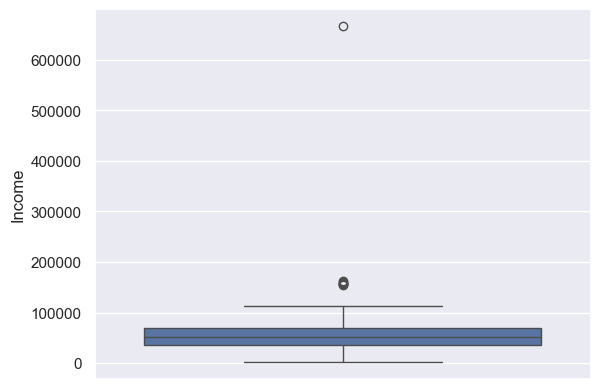

In [38]:
sns.boxplot(marketing['Income'])

In [39]:
q1=marketing['Income'].quantile(0.25)
q2=marketing['Income'].median()
q3=marketing['Income'].quantile(0.75)  
iqr=q3-q1
lower_bound=q1 - 1.5 *iqr 
upper_bound=q3 + 1.5 *iqr 
lower_bound , upper_bound 

(-14525.5, 118350.5)

In [40]:
marketing_Income_no_outliers = marketing[
    (marketing['Income'] >= (q1 - 1.5 * iqr)) & (marketing['Income'] <= (q3 + 1.5 * iqr))
].sort_index(ignore_index=True)
marketing_Income_no_outliers

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0     Bachelor         Single  58138.0       58       635         88   
1     Bachelor         Single  46344.0       38        11          1   
2     Bachelor      Partnered  71613.0       26       426         49   
3     Bachelor      Partnered  26646.0       26        11          4   
4          PhD      Partnered  58293.0       94       173         43   
...        ...            ...      ...      ...       ...        ...   
2203  Bachelor      Partnered  61223.0       46       709         43   
2204       PhD      Partnered  64014.0       56       406          0   
2205  Bachelor       Divorced  56981.0       91       908         48   
2206    Master      Partnered  69245.0        8       428         30   
2207       PhD      Partnered  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2203              182               42               118           247  ...   
2204               30                0                 0             8  ...   
2205              217               32                12            24  ...   
2206              214               80                30            61  ...   
2207               61                2                 1            21  ...   

      AcceptedCmp2  Complain  Response  TotalAcceptedCmp  TotalSpend  Age  \
0                0         0         1                 0        1617   68   
1                0         0         0                 0          27   71   
2                0         0         0                 0         776   60   
3                0         0         0                 0          53   41   
4                0         0         0                 0         422   44   
...            ...       ...       ...               ...         ...  ...   
2203             0         0         0                 0        1341   58   
2204             0         0         0                 1         444   79   
2205             0         0         0                 1        1241   44   
2206             0         0         0                 0         843   69   
2207             0         0         1                 0         172   71   

      Customer_For_Years  FamilySize  Age_Group   Spend_Group  
0                     12           1     Senior  High Spender  
1                     11           3     Senior   Low Spender  
2                     11           2     Senior   Mid Spender  
3                     11           3      Adult   Low Spender  
4                     11           3      Adult   Mid Spender  
...                  ...         ...        ...           ...  
2203                  12           3     Senior  High Spender  
2204                  11           5     Senior   Mid Spender  
2205                  11           1      Adult  High Spender  
2206                  11           3     Senior   Mid Spender  
2207                  12           4     Senior   Mid Spender  

[2208 rows x 29 columns]

In [41]:
marketing_Income_no_outliers.groupby(['FamilySize','Age_Group','Spend_Group','Education','Marital_Status'],observed=True)['Income'].mean()

FamilySize  Age_Group    Spend_Group   Education  Marital_Status
1           Young Adult  Low Spender   Bachelor   Single            34824.000000
                         Mid Spender   Bachelor   Single            52756.800000
                         High Spender  Bachelor   Single            80138.100000
                                       Master     Single            84399.857143
                                       PhD        Single            68126.000000
                                                                        ...     
5           Senior       Mid Spender   Bachelor   Partnered         44630.250000
                                       Master     Partnered         56962.000000
                                       PhD        Partnered         56140.166667
                         High Spender  Bachelor   Partnered         93404.000000
                                       PhD        Partnered         64504.000000
Name: Income, Length: 247, dtype: float64

In [42]:
marketing['Mean_income']=marketing_Income_no_outliers.groupby(['FamilySize','Age_Group','Spend_Group','Education','Marital_Status'],observed=True)['Income'].transform('mean').round(1)
marketing.head(10)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Bachelor         Single  58138.0       58       635         88   
1  Bachelor         Single  46344.0       38        11          1   
2  Bachelor      Partnered  71613.0       26       426         49   
3  Bachelor      Partnered  26646.0       26        11          4   
4       PhD      Partnered  58293.0       94       173         43   
5    Master      Partnered  62513.0       16       520         42   
6  Bachelor       Divorced  55635.0       34       235         65   
7       PhD      Partnered  33454.0       32        76         10   
8       PhD      Partnered  30351.0       19        14          0   
9       PhD      Partnered   5648.0       68        28          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   
5               98                0                42            14  ...   
6              164               50                49            27  ...   
7               56                3                 1            23  ...   
8               24                3                 3             2  ...   
9                6                1                 1            13  ...   

   Complain  Response  TotalAcceptedCmp  TotalSpend  Age  Customer_For_Years  \
0         0         1                 0        1617   68                  12   
1         0         0                 0          27   71                  11   
2         0         0                 0         776   60                  11   
3         0         0                 0          53   41                  11   
4         0         0                 0         422   44                  11   
5         0         0                 0         716   58                  11   
6         0         0                 0         590   54                  12   
7         0         0                 0         169   40                  12   
8         0         1                 0          46   51                  12   
9         0         0                 1          49   75                  11   

   FamilySize    Age_Group   Spend_Group  Mean_income  
0           1       Senior  High Spender      75709.1  
1           3       Senior   Low Spender      35060.3  
2           2       Senior   Mid Spender      59400.9  
3           3        Adult   Low Spender      27463.8  
4           3        Adult   Mid Spender      41692.9  
5           3       Senior   Mid Spender      54627.4  
6           2  Middle Aged   Mid Spender      57959.4  
7           3        Adult   Mid Spender      41692.9  
8           3  Middle Aged   Low Spender      34358.1  
9           4       Senior   Low Spender      36249.1  

[10 rows x 30 columns]

In [43]:
marketing['Income'] = marketing['Income'].fillna(marketing['Mean_income'])

In [44]:
marketing.drop('Mean_income', axis=1, inplace=True)

In [45]:
marketing[marketing['Income'].isna()]

Education Marital_Status  Income  Recency  MntWines  MntFruits  \
2228    Master      Partnered     NaN       53        32          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
2228             1607               12                 4            22  ...   

      AcceptedCmp2  Complain  Response  TotalAcceptedCmp  TotalSpend  Age  \
2228             0         0         0                 1        1679   47   

      Customer_For_Years  FamilySize    Age_Group   Spend_Group  
2228                  13           2  Middle Aged  High Spender  

[1 rows x 29 columns]

In [46]:
marketing['Income'] = marketing['Income'].fillna(marketing_Income_no_outliers['Income'].mean().round(1))

In [47]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2240 non-null   category
 1   Marital_Status       2240 non-null   category
 2   Income               2240 non-null   float64 
 3   Recency              2240 non-null   int64   
 4   MntWines             2240 non-null   int64   
 5   MntFruits            2240 non-null   int64   
 6   MntMeatProducts      2240 non-null   int64   
 7   MntFishProducts      2240 non-null   int64   
 8   MntSweetProducts     2240 non-null   int64   
 9   MntGoldProds         2240 non-null   int64   
 10  NumDealsPurchases    2240 non-null   int64   
 11  NumWebPurchases      2240 non-null   int64   
 12  NumCatalogPurchases  2240 non-null   int64   
 13  NumStorePurchases    2240 non-null   int64   
 14  NumWebVisitsMonth    2240 non-null   int64   
 15  AcceptedCmp3         

In [48]:
print(marketing['Age'].max())

132


In [49]:
marketing = marketing[marketing['Age'] < 100].reset_index(drop=True)
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2237 non-null   category
 1   Marital_Status       2237 non-null   category
 2   Income               2237 non-null   float64 
 3   Recency              2237 non-null   int64   
 4   MntWines             2237 non-null   int64   
 5   MntFruits            2237 non-null   int64   
 6   MntMeatProducts      2237 non-null   int64   
 7   MntFishProducts      2237 non-null   int64   
 8   MntSweetProducts     2237 non-null   int64   
 9   MntGoldProds         2237 non-null   int64   
 10  NumDealsPurchases    2237 non-null   int64   
 11  NumWebPurchases      2237 non-null   int64   
 12  NumCatalogPurchases  2237 non-null   int64   
 13  NumStorePurchases    2237 non-null   int64   
 14  NumWebVisitsMonth    2237 non-null   int64   
 15  AcceptedCmp3         

In [50]:
marketing.describe()

Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2237.000000  2237.000000  2237.000000  2237.000000      2237.000000   
mean    52178.412696    49.104604   303.995530    26.270451       166.916853   
std     25102.977153    28.956073   336.574382    39.715972       225.661158   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35322.000000    24.000000    24.000000     1.000000        16.000000   
50%     51315.000000    49.000000   174.000000     8.000000        67.000000   
75%     68352.000000    74.000000   504.000000    33.000000       232.000000   
max    666666.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2237.000000       2237.000000   2237.000000        2237.000000   
mean         37.523022         27.068842     43.968708           2.326777   
std          54.639909         41.293949     52.054318           1.932923   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count      2237.000000  ...   2237.000000   2237.000000   2237.000000   
mean          4.087170  ...      0.072418      0.064372      0.013411   
std           2.779461  ...      0.259237      0.245469      0.115052   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           2.000000  ...      0.000000      0.000000      0.000000   
50%           4.000000  ...      0.000000      0.000000      0.000000   
75%           6.000000  ...      0.000000      0.000000      0.000000   
max          27.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response  TotalAcceptedCmp   TotalSpend          Age  \
count  2237.000000  2237.000000       2237.000000  2237.000000  2237.000000   
mean      0.008941     0.149307          0.297720   605.743406    56.098346   
std       0.094152     0.356471          0.678615   601.840466    11.701917   
min       0.000000     0.000000          0.000000     5.000000    29.000000   
25%       0.000000     0.000000          0.000000    69.000000    48.000000   
50%       0.000000     0.000000          0.000000   396.000000    55.000000   
75%       0.000000     0.000000          0.000000  1045.000000    66.000000   
max       1.000000     1.000000          4.000000  2525.000000    85.000000   

       Customer_For_Years   FamilySize  
count         2237.000000  2237.000000  
mean            11.569066     2.595887  
std              0.536911     0.907305  
min             11.000000     1.000000  
25%             11.000000     2.000000  
50%             12.000000     3.000000  
75%             12.000000     3.000000  
max             13.000000     5.000000  

[8 rows x 25 columns]

In [51]:
marketing['Income'].nlargest(10)

2230    666666.0
614     162397.0
684     160803.0
1297    157733.0
164     157243.0
1650    157146.0
2129    156924.0
652     153924.0
1895    113734.0
643     105471.0
Name: Income, dtype: float64

In [52]:
marketing = marketing[marketing['Income'] < 163000].reset_index(drop=True)

marketing['Income'].max()

162397.0

In [53]:
marketing['TotalSpend'].nlargest(10)

1176    2525
1569    2525
1489    2524
984     2486
1049    2440
1598    2352
1455    2349
1285    2346
940     2302
1298    2302
Name: TotalSpend, dtype: int64

<Axes: ylabel='TotalSpend'>

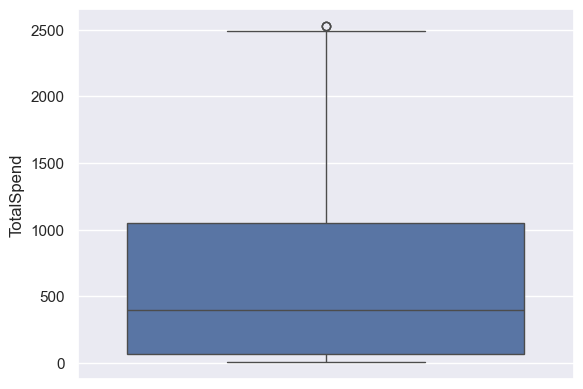

In [54]:
sns.boxplot(marketing['TotalSpend'])

In [55]:
marketing.describe() , marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2236 non-null   category
 1   Marital_Status       2236 non-null   category
 2   Income               2236 non-null   float64 
 3   Recency              2236 non-null   int64   
 4   MntWines             2236 non-null   int64   
 5   MntFruits            2236 non-null   int64   
 6   MntMeatProducts      2236 non-null   int64   
 7   MntFishProducts      2236 non-null   int64   
 8   MntSweetProducts     2236 non-null   int64   
 9   MntGoldProds         2236 non-null   int64   
 10  NumDealsPurchases    2236 non-null   int64   
 11  NumWebPurchases      2236 non-null   int64   
 12  NumCatalogPurchases  2236 non-null   int64   
 13  NumStorePurchases    2236 non-null   int64   
 14  NumWebVisitsMonth    2236 non-null   int64   
 15  AcceptedCmp3         

(              Income      Recency    MntWines    MntFruits  MntMeatProducts  \
 count    2236.000000  2236.000000  2236.00000  2236.000000      2236.000000   
 mean    51903.597138    49.116279   304.12746    26.275939       166.983453   
 std     21480.678495    28.957284   336.59181    39.724007       225.689645   
 min      1730.000000     0.000000     0.00000     0.000000         0.000000   
 25%     35303.000000    24.000000    24.00000     1.000000        16.000000   
 50%     51301.000000    49.000000   174.00000     8.000000        67.000000   
 75%     68325.000000    74.000000   504.25000    33.000000       232.000000   
 max    162397.000000    99.000000  1493.00000   199.000000      1725.000000   
 
        MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
 count      2236.000000       2236.000000   2236.000000        2236.000000   
 mean         37.536225         27.080501     43.983005           2.326029   
 std          54.648562         41.299504   

In [56]:
marketing.head(3)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Bachelor         Single  58138.0       58       635         88   
1  Bachelor         Single  46344.0       38        11          1   
2  Bachelor      Partnered  71613.0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   

   AcceptedCmp2  Complain  Response  TotalAcceptedCmp  TotalSpend  Age  \
0             0         0         1                 0        1617   68   
1             0         0         0                 0          27   71   
2             0         0         0                 0         776   60   

   Customer_For_Years  FamilySize  Age_Group   Spend_Group  
0                  12           1     Senior  High Spender  
1                  11           3     Senior   Low Spender  
2                  11           2     Senior   Mid Spender  

[3 rows x 29 columns]

In [57]:
new_columns=['Education', 'Age', 'Marital_Status', 'Income', 'FamilySize',
       'Recency', 'TotalSpend','Customer_For_Years','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'TotalAcceptedCmp','Age_Group', 'Spend_Group']
marketing[new_columns]

Education  Age Marital_Status   Income  FamilySize  Recency  TotalSpend  \
0     Bachelor   68         Single  58138.0           1       58        1617   
1     Bachelor   71         Single  46344.0           3       38          27   
2     Bachelor   60      Partnered  71613.0           2       26         776   
3     Bachelor   41      Partnered  26646.0           3       26          53   
4          PhD   44      Partnered  58293.0           3       94         422   
...        ...  ...            ...      ...         ...      ...         ...   
2231  Bachelor   58      Partnered  61223.0           3       46        1341   
2232       PhD   79      Partnered  64014.0           5       56         444   
2233  Bachelor   44       Divorced  56981.0           1       91        1241   
2234    Master   69      Partnered  69245.0           3        8         843   
2235       PhD   71      Partnered  52869.0           4       40         172   

      Customer_For_Years  MntWines  MntFruits  ...  Complain  Response  \
0                     12       635         88  ...         0         1   
1                     11        11          1  ...         0         0   
2                     11       426         49  ...         0         0   
3                     11        11          4  ...         0         0   
4                     11       173         43  ...         0         0   
...                  ...       ...        ...  ...       ...       ...   
2231                  12       709         43  ...         0         0   
2232                  11       406          0  ...         0         0   
2233                  11       908         48  ...         0         0   
2234                  11       428         30  ...         0         0   
2235                  12        84          3  ...         0         1   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2231             0             0             0             0             0   
2232             1             0             0             0             0   
2233             0             0             0             1             0   
2234             0             0             0             0             0   
2235             0             0             0             0             0   

      TotalAcceptedCmp  Age_Group   Spend_Group  
0                    0     Senior  High Spender  
1                    0     Senior   Low Spender  
2                    0     Senior   Mid Spender  
3                    0      Adult   Low Spender  
4                    0      Adult   Mid Spender  
...                ...        ...           ...  
2231                 0     Senior  High Spender  
2232                 1     Senior   Mid Spender  
2233                 1      Adult  High Spender  
2234                 0     Senior   Mid Spender  
2235                 0     Senior   Mid Spender  

[2236 rows x 29 columns]

In [58]:
marketing.to_csv('../Data/marketing_campaign_cleaned.csv', sep='\t', index=False, encoding='utf-8')

## 📊 Exploratory Data Analysis (EDA)

Analyzing general patterns in customer behavior and spending.


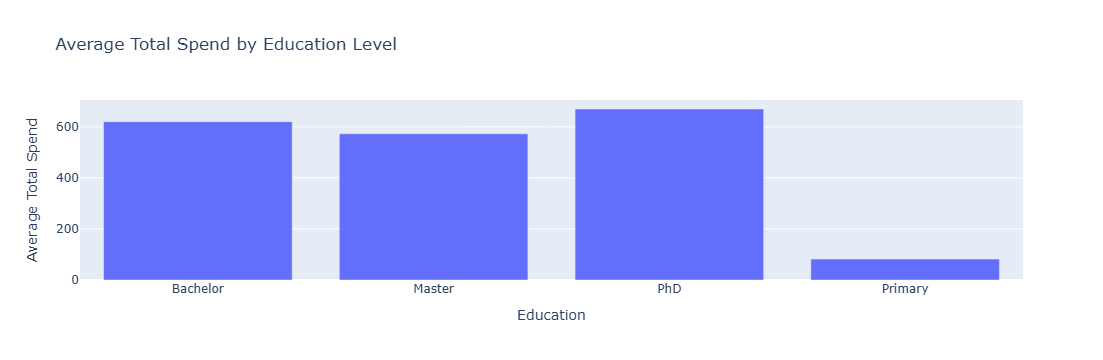

In [60]:
edu_mean_spend = marketing.groupby('Education',observed=False)['TotalSpend'].mean().reset_index()
px.bar(
    edu_mean_spend,
    x='Education',
    y='TotalSpend',
    title='Average Total Spend by Education Level',
    labels={'TotalSpend': 'Average Total Spend'})

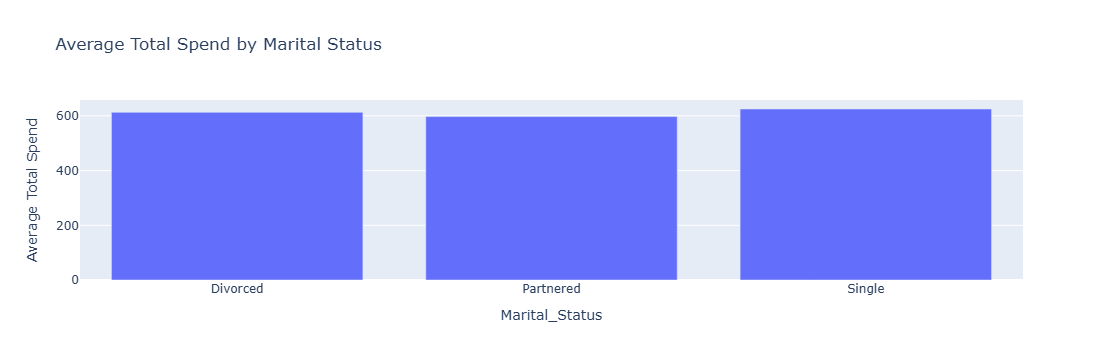

In [61]:
status_mean_spend = marketing.groupby('Marital_Status',observed=False)['TotalSpend'].mean().reset_index()
px.bar(
    status_mean_spend,
    x='Marital_Status',
    y='TotalSpend',
    title='Average Total Spend by Marital Status',
    labels={'TotalSpend': 'Average Total Spend'})

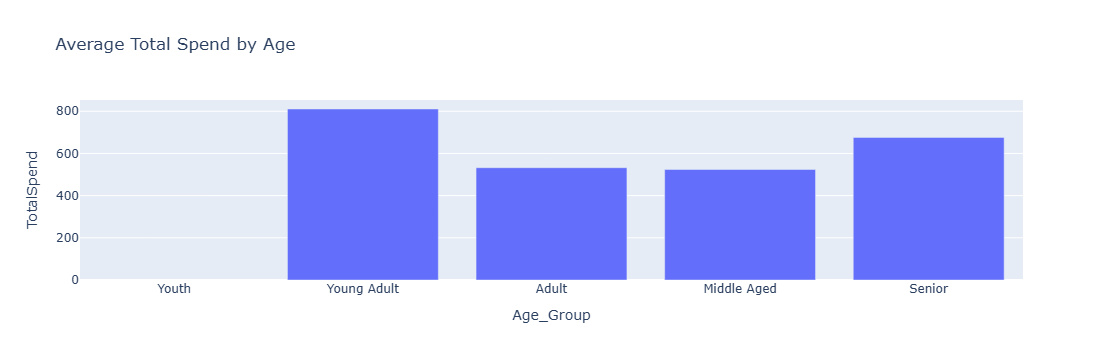

In [62]:
age_mean_group=marketing.groupby('Age_Group',observed=False)['TotalSpend'].mean().reset_index()

px.bar(age_mean_group,
       x='Age_Group',
       y='TotalSpend',
       title='Average Total Spend by Age')

In [81]:
marketing['Customer_For_Years'].value_counts()


Customer_For_Years
12    1176
11    1012
13      48
Name: count, dtype: int64

In [82]:
marketing=marketing.drop(columns='Customer_For_Years')

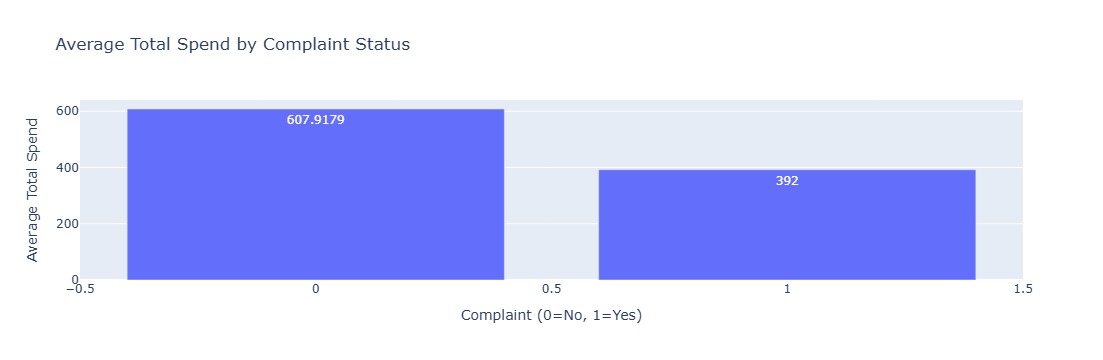

In [83]:
complain_spend = marketing.groupby('Complain')['TotalSpend'].mean().reset_index()

fig = px.bar(
    complain_spend,
    x='Complain',
    y='TotalSpend',
    title='Average Total Spend by Complaint Status',
    labels={'Complain': 'Complaint (0=No, 1=Yes)', 'TotalSpend': 'Average Total Spend'},
    text_auto=True
)
fig.show()

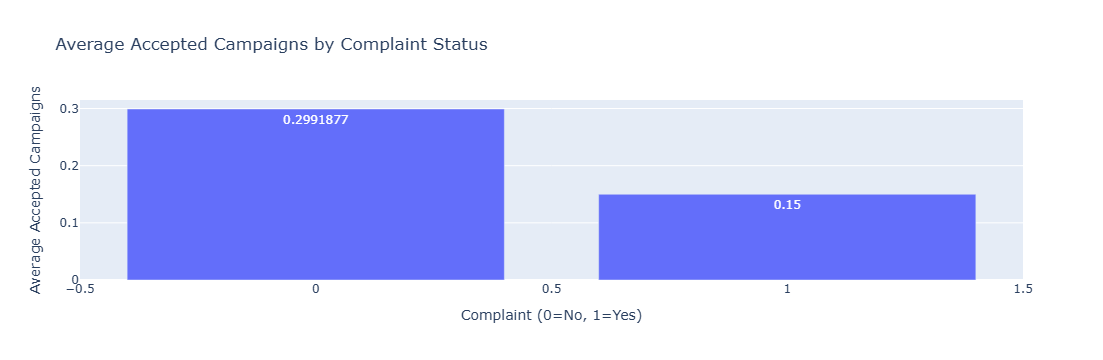

In [84]:
complain_response = marketing.groupby('Complain')['TotalAcceptedCmp'].mean().reset_index()

fig = px.bar(
    complain_response,
    x='Complain',
    y='TotalAcceptedCmp',
    title='Average Accepted Campaigns by Complaint Status',
    labels={'Complain': 'Complaint (0=No, 1=Yes)', 'TotalAcceptedCmp': 'Average Accepted Campaigns'},
    text_auto=True
)
fig.show()


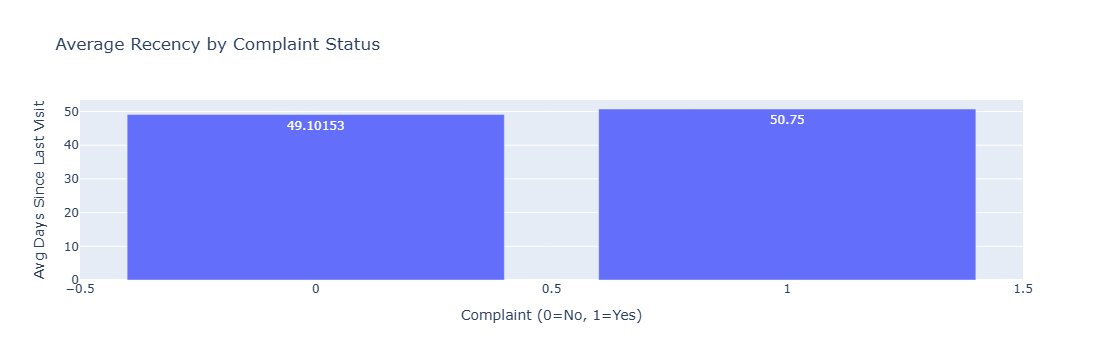

In [85]:
complain_recency = marketing.groupby('Complain')['Recency'].mean().reset_index()

fig = px.bar(
    complain_recency,
    x='Complain',
    y='Recency',
    title='Average Recency by Complaint Status',
    labels={'Complain': 'Complaint (0=No, 1=Yes)', 'Recency': 'Avg Days Since Last Visit'},
    text_auto=True
)
fig.show()


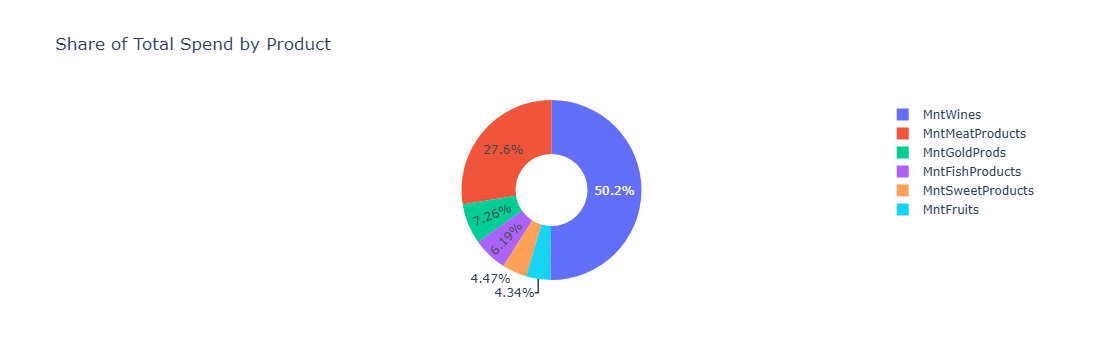

In [86]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

product_sums = marketing[product_cols].sum().reset_index()
product_sums.columns = ['Product', 'TotalSpend']

fig = px.pie(
    product_sums,
    names='Product',
    values='TotalSpend',
    title='Share of Total Spend by Product',
    hole=0.4
)

fig.show()

##### 🧓👶 Age Group vs Favorite Product

In [88]:
prod_for_age = marketing.groupby('Age_Group', observed=False)[product_cols].mean()
most_purchased_product = prod_for_age.idxmax(axis=1).reset_index()
most_purchased_product

C:\Users\adham\AppData\Local\Temp\ipykernel_8052\942309990.py:2: FutureWarning:

The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



Age_Group         0
0        Youth       NaN
1  Young Adult  MntWines
2        Adult  MntWines
3  Middle Aged  MntWines
4       Senior  MntWines

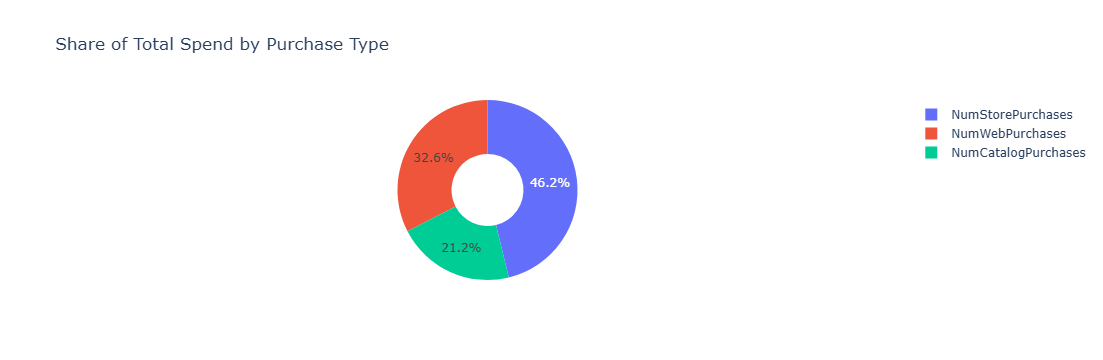

In [89]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

purchase_mean = marketing[purchase_cols].mean().reset_index()
purchase_mean.columns = ['PurchaseType', 'TotalSpend']


px.pie(
    purchase_mean,
    names='PurchaseType',
    values='TotalSpend',
    title='Share of Total Spend by Purchase Type',
    hole=0.4
)

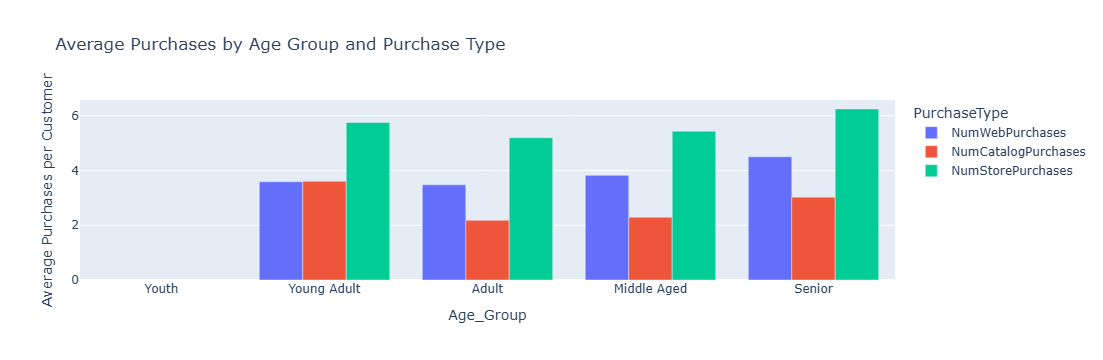

In [90]:
age_purchase_mean = marketing.groupby('Age_Group', observed=False)[purchase_cols].mean().reset_index()

age_purchase_melted = age_purchase_mean.melt(id_vars='Age_Group',
                                              value_vars=purchase_cols,
                                              var_name='PurchaseType',
                                              value_name='AveragePurchases')


px.bar(
    age_purchase_melted,
    x='Age_Group',
    y='AveragePurchases',
    color='PurchaseType',
    barmode='group',
    title='Average Purchases by Age Group and Purchase Type',
    labels={'AveragePurchases': 'Average Purchases per Customer'}
)


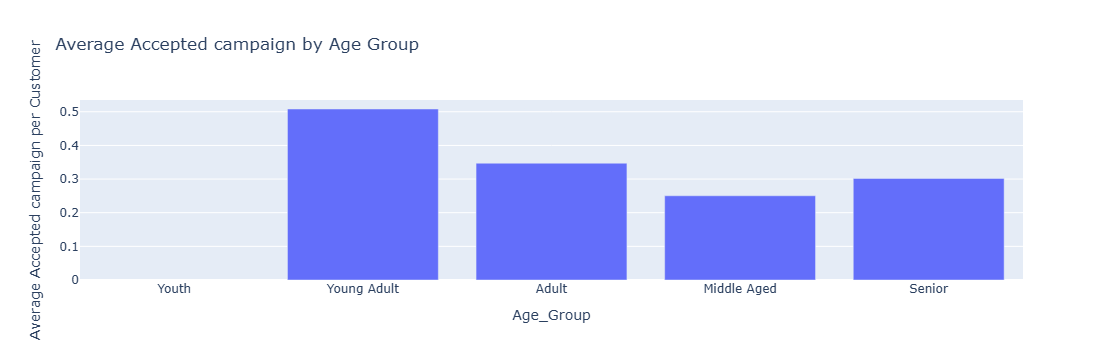

In [91]:
AgeCmp=marketing.groupby('Age_Group',observed=False)['TotalAcceptedCmp'].mean().reset_index()
px.bar(
    AgeCmp,
    x='Age_Group',
    y='TotalAcceptedCmp',
    title='Average Accepted campaign by Age Group ',
    labels={'TotalAcceptedCmp': 'Average Accepted campaign per Customer'}
)


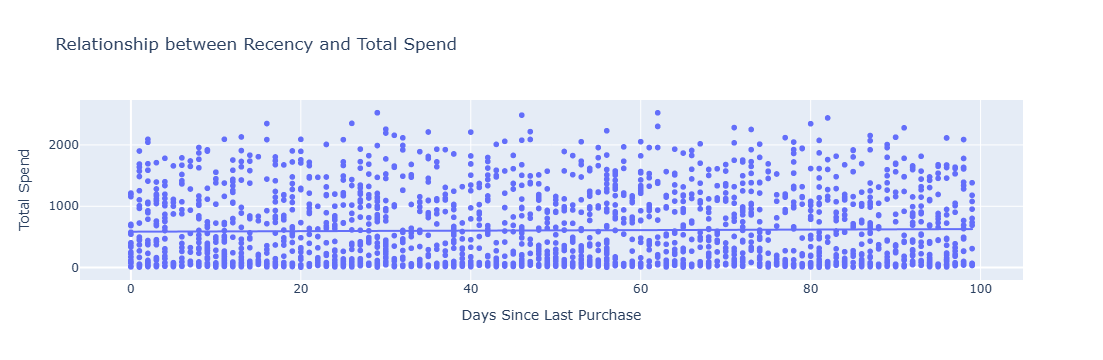

In [92]:
px.scatter(
    marketing,
    x='Recency',
    y='TotalSpend',
    trendline='ols',
    title='Relationship between Recency and Total Spend',
    labels={'Recency': 'Days Since Last Purchase', 'TotalSpend': 'Total Spend'}
)


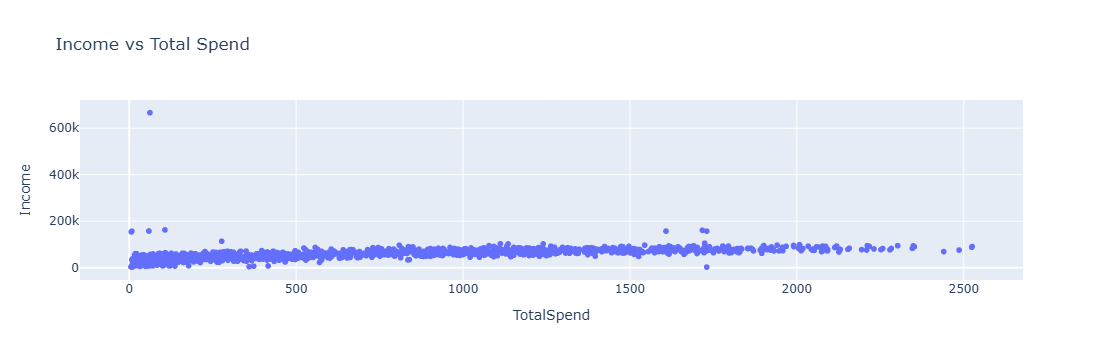

In [93]:
px.scatter(df, x='TotalSpend', y='Income', title='Income vs Total Spend')

In [94]:
income_product = marketing[['Income'] + product_cols].melt(id_vars='Income', 
                                                            var_name='Product', 
                                                            value_name='Spend')

income_product['IncomeGroup'] = pd.qcut(income_product['Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

mean_income_spend = income_product.groupby(['IncomeGroup', 'Product'],observed=False )['Spend'].mean().reset_index()


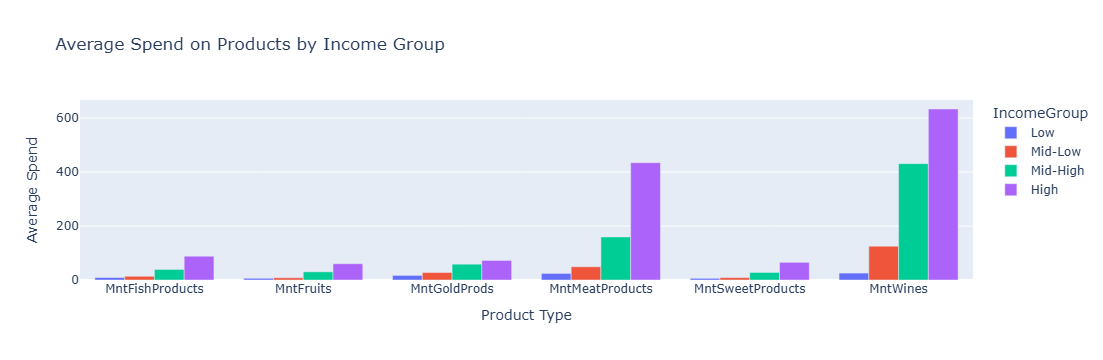

In [95]:
px.bar(
    mean_income_spend,
    x='Product',
    y='Spend',
    color='IncomeGroup',
    barmode='group',
    title='Average Spend on Products by Income Group',
    labels={'Spend': 'Average Spend', 'Product': 'Product Type'}
)

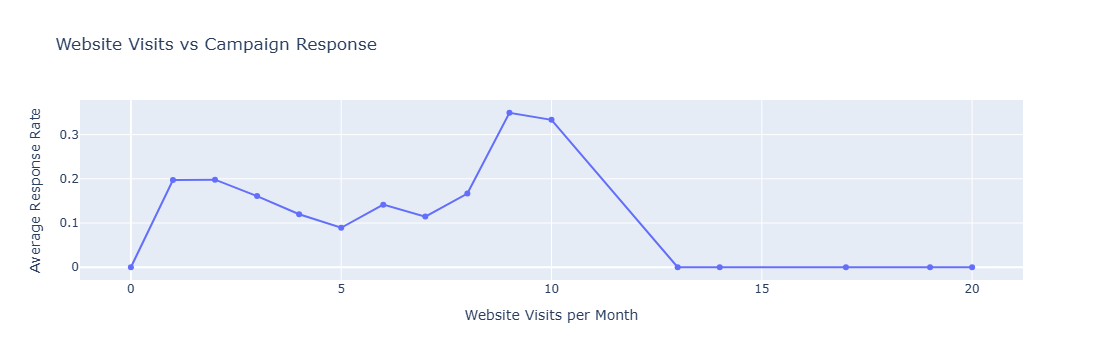

In [96]:
web_visits_response = marketing.groupby('NumWebVisitsMonth', observed=False)['Response'].mean().reset_index()

px.line(
    web_visits_response,
    x='NumWebVisitsMonth',
    y='Response',
    title='Website Visits vs Campaign Response',
    labels={'NumWebVisitsMonth': 'Website Visits per Month', 'Response': 'Average Response Rate'},
    markers=True
)


Text(0.5, 1.0, 'Marital Status-wise Spending Distribution')

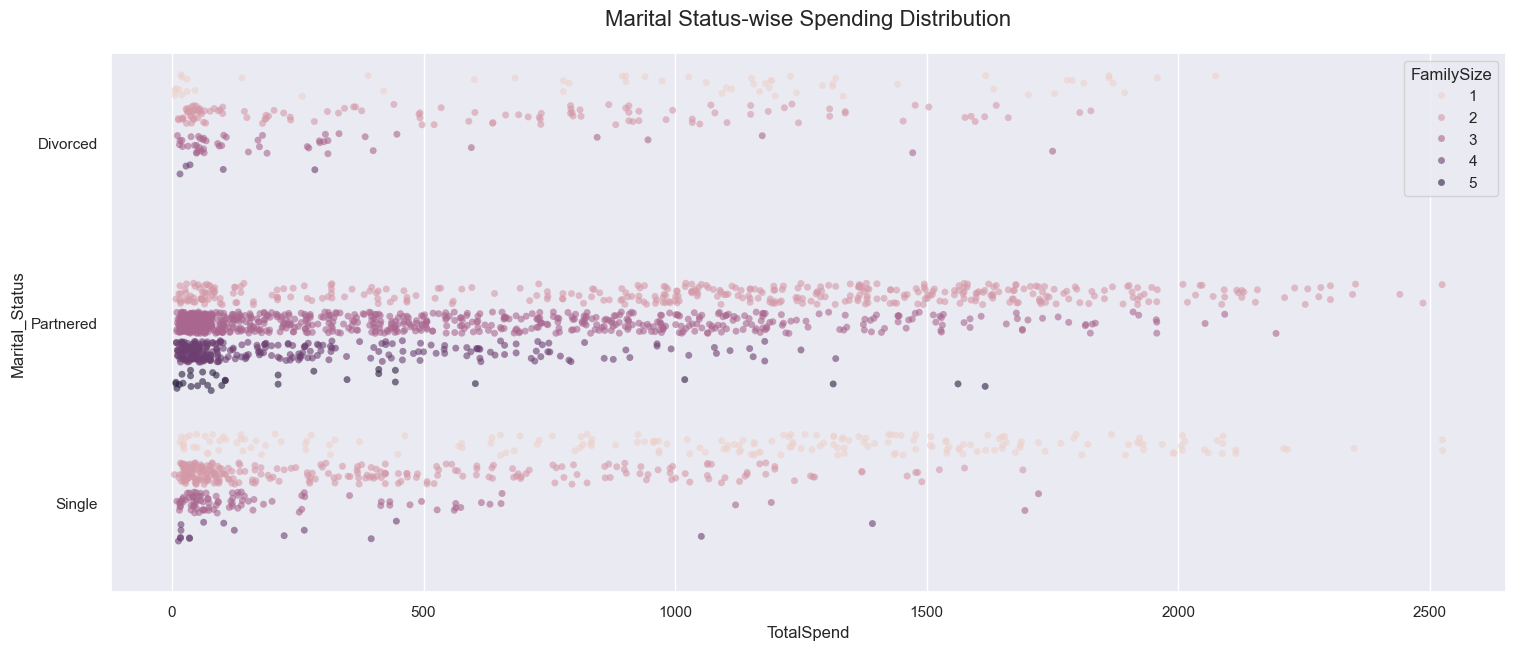

In [97]:
plt.figure(figsize=(18,7))
sns.stripplot(
    data=marketing,
    x='TotalSpend',
    y='Marital_Status',
    hue='FamilySize',
    dodge=True,
    alpha=0.6,
    jitter=0.3,)
plt.title('Marital Status-wise Spending Distribution',pad=20,fontdict={'fontsize': 16})

In [98]:
marketing.to_csv('Marketing campaign CLeaned.csv',sep='\t')

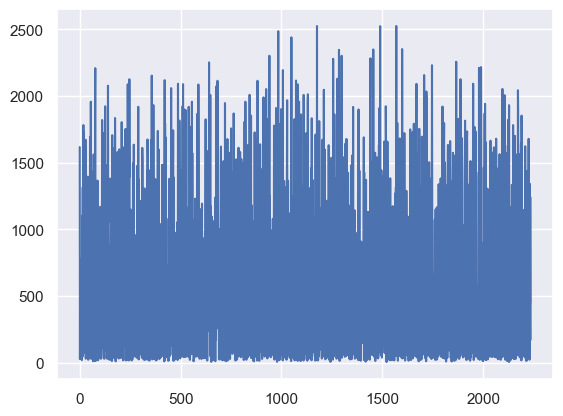

In [156]:
marketing['TotalSpend'].value_counts
plt.plot(marketing['TotalSpend'])

## ✅ Summary & Insights

- Who are the most valuable customer segments?
- What are the top-selling products?
- How should the company tailor its marketing efforts?
